In [191]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [192]:
data_name = "transformed_ecoPlus"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,13,460,25,neutral or dissatisfied
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,26,1142,0,satisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,61,214,0,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

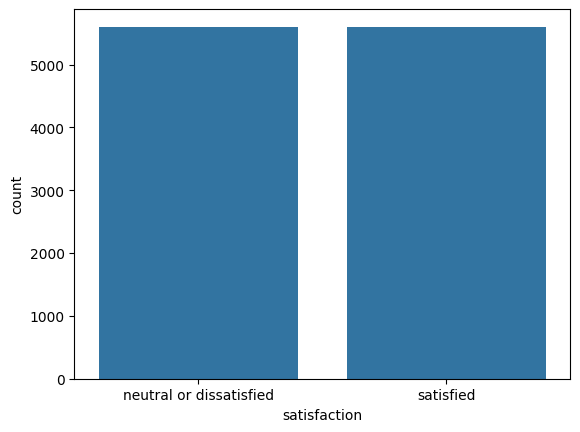

In [193]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [194]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,13,460,25
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,25,235,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,26,1142,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,25,562,11
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,61,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,57,640,0
11202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,23,965,18
11203,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,36,273,0
11204,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,31,399,11


In [195]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
11201                  satisfied
11202                  satisfied
11203                  satisfied
11204                  satisfied
11205                  satisfied
Name: satisfaction, Length: 11206, dtype: object

In [196]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (7844, 80) and test set is :(3362, 80)


In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.16258189,  2.96114313, -0.45533115, ..., -0.88892386,
         0.03258567, -0.34461333],
       [-0.16258189, -0.33770742, -0.45533115, ..., -0.12909254,
        -0.36686523, -0.058959  ],
       [-0.16258189,  2.96114313, -0.45533115, ..., -1.3321588 ,
        -0.10464899, -0.34461333],
       ...,
       [-0.16258189, -0.33770742, -0.45533115, ...,  0.75737734,
         1.22358651, -0.48744049],
       [-0.16258189, -0.33770742, -0.45533115, ..., -0.38236965,
        -0.4795937 , -0.48744049],
       [-0.16258189,  2.96114313, -0.45533115, ...,  1.83380504,
        -0.07769218, -0.48744049]])

## Set paramiter CV

In [198]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.082762 วินาที


In [200]:
#Predict the accuracy of the model
y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 95.63 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.96      1677
              satisfied       0.96      0.95      0.96      1685

               accuracy                           0.96      3362
              macro avg       0.96      0.96      0.96      3362
           weighted avg       0.96      0.96      0.96      3362



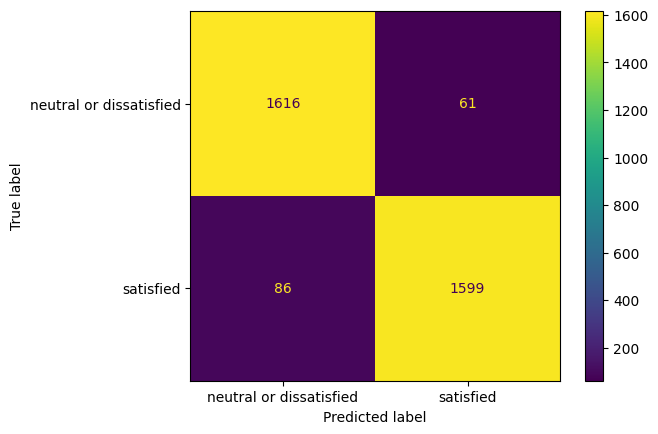

In [201]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

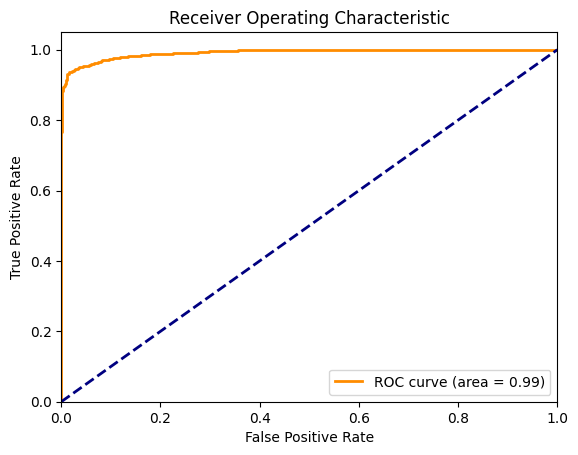

In [202]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_lr.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [203]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")


Cross Validation Scores (Logistic Regression): [0.95219885 0.94263862 0.9541109  0.94646272 0.94072658 0.96749522
 0.9541109  0.93499044 0.95028681 0.9541109  0.96175908 0.95219885
 0.95219885 0.93116635 0.96168582]
Mean CV Accuracy: 0.9504
Standard Deviation CV Accuracy: 0.0096
เวลาที่ใช้ในการทำ Cross Validation: 0.739576 วินาที


In [204]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9538500764915859
Test Accuracy: 0.9562760261748959


## Save Model Predic

In [205]:
import pickle
pickle_out = open("../../pipelines/model_LR_ecoPlus.pkl", mode = "wb")
pickle.dump(model_lr, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_LR_ecoPlus.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [206]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,satisfaction
5867,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,61,1040,0,satisfied
10061,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,34,101,0,satisfied
8972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,24,642,2,satisfied
2629,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,29,358,13,neutral or dissatisfied
294,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,32,954,0,neutral or dissatisfied
2968,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,12,337,1,satisfied
1070,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,63,1045,0,neutral or dissatisfied
1684,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,1,16,332,0,neutral or dissatisfied
4288,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,1,8,634,0,neutral or dissatisfied
4325,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,72,1146,0,neutral or dissatisfied


In [207]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes
5867,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,61,1040,0
10061,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,34,101,0
8972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,24,642,2
2629,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,29,358,13
294,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,32,954,0
2968,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,12,337,1
1070,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,63,1045,0
1684,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,1,16,332,0
4288,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,8,634,0
4325,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,72,1146,0


In [208]:
y_sam = df_sam.iloc[:,-1]
y_sam


5867                   satisfied
10061                  satisfied
8972                   satisfied
2629     neutral or dissatisfied
294      neutral or dissatisfied
2968                   satisfied
1070     neutral or dissatisfied
1684     neutral or dissatisfied
4288     neutral or dissatisfied
4325     neutral or dissatisfied
7280                   satisfied
6649     neutral or dissatisfied
10675                  satisfied
1008     neutral or dissatisfied
796                    satisfied
117                    satisfied
1645     neutral or dissatisfied
6855     neutral or dissatisfied
3072     neutral or dissatisfied
6160     neutral or dissatisfied
Name: satisfaction, dtype: object

In [209]:
model = pickle.load(open("../../pipelines/model_LR_ecoPlus.pkl", 'rb'))
scaler_LR = pickle.load(open("../../pipelines/scaler_LR_ecoPlus.pkl", 'rb'))

scaler_new = scaler_LR.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of LR is : {round(accuracy_KNN*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied']
Accuracy of LR is : 100.0 % .
